In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import sklearn.model_selection as train_test_split
from tensorflow.keras.datasets import mnist
from torch.utils.data import dataset, DataLoader
%matplotlib inline
import matplotlib.pyplot as plt



In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
N_train = 6000
N_test  = 1000

X_train = X_train[:N_train]
y_train = y_train[:N_train]
X_test  = X_test[:N_test]
y_test  = y_test[:N_test]

X_train.shape

(6000, 28, 28)

In [ ]:
_, counts_train = np.unique(y_train, return_counts=True)
_, counts_test  = np.unique(y_test,  return_counts=True)

print("Train counts per class:", counts_train)
print("Test counts per class: ", counts_test)


Train counts per class: [592 671 581 608 623 514 608 651 551 601]
Test counts per class:  [ 85 126 116 107 110  87  87  99  89  94]


In [ ]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
X_test.shape

(1000, 28, 28)

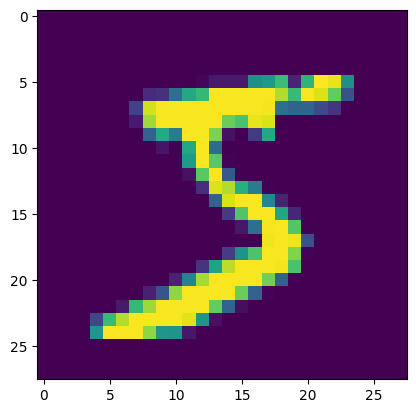

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0


In [ ]:
class My_Dataset(dataset.Dataset):
    def __init__(self,x,y):
      self.X = torch.tensor(x, dtype=torch.float32)
      self.Y = torch.tensor(y, dtype=torch.float32)

    def __getitem__(self,idx):
      return self.X[idx], self.Y[idx]

    def __len__(self):
      return len(self.X)

In [ ]:
training_Dataset = My_Dataset(X_train, y_train)
testing_Dataset = My_Dataset(X_test, y_test)

training_dataloader = DataLoader(training_Dataset, batch_size=32, shuffle=True)
testing_dataloader = DataLoader(testing_Dataset, batch_size = 32, shuffle = True)

In [ ]:
class my_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            # input: (batch, 1, 28, 28)
            nn.Conv2d(1, 32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(),
            nn.Linear(128*1*1, 10)
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
X_train.shape

(6000, 28, 28, 1)

In [ ]:
input_dim = X_train.shape
model = my_CNN()


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params= model.parameters(),
    lr = 0.05
)

In [ ]:
loss_per_epoch = []
acc_per_epoch = []

for epoch in range(50):
    total_cost    = 0.0
    total_correct = 0


    for batch_x, batch_y in training_dataloader:

        optimizer.zero_grad()

        if batch_x.dim() == 4 and batch_x.shape[1] == 28:
            batch_x = batch_x.permute(0, 3, 1, 2)
            batch_y = batch_y.long()


        logits = model(batch_x)
        loss   = criterion(logits, batch_y)

        loss.backward()
        optimizer.step()


        total_cost    += loss.item()
        preds          = torch.argmax(logits, dim=1)
        total_correct += (preds == batch_y).sum().item()

    avg_cost = total_cost / len(training_dataloader)
    acc      = total_correct / len(training_dataloader.dataset)

    loss_per_epoch.append(avg_cost)
    acc_per_epoch.append(acc)
    print(f"Epoch {epoch+1:2d}: loss={avg_cost:.4f}, acc={acc:.4%}")

Epoch  1: loss=1.6757, acc=45.6500%
Epoch  2: loss=0.4608, acc=86.1000%
Epoch  3: loss=0.2670, acc=91.7333%
Epoch  4: loss=0.2048, acc=94.0000%
Epoch  5: loss=0.1686, acc=94.8333%
Epoch  6: loss=0.1427, acc=95.7500%
Epoch  7: loss=0.1241, acc=96.5833%
Epoch  8: loss=0.1053, acc=96.7833%
Epoch  9: loss=0.0933, acc=97.1667%
Epoch 10: loss=0.0808, acc=97.6000%
Epoch 11: loss=0.0684, acc=98.2167%
Epoch 12: loss=0.0610, acc=98.0000%
Epoch 13: loss=0.0559, acc=98.4833%
Epoch 14: loss=0.0481, acc=98.5667%
Epoch 15: loss=0.0637, acc=98.3000%
Epoch 16: loss=0.0432, acc=98.9000%
Epoch 17: loss=0.0323, acc=99.1500%
Epoch 18: loss=0.0295, acc=99.2333%
Epoch 19: loss=0.0254, acc=99.3667%
Epoch 20: loss=0.0217, acc=99.3500%
Epoch 21: loss=0.0212, acc=99.4167%
Epoch 22: loss=0.0141, acc=99.6667%
Epoch 23: loss=0.0125, acc=99.7000%
Epoch 24: loss=0.0097, acc=99.8000%
Epoch 25: loss=0.0087, acc=99.8167%
Epoch 26: loss=0.0063, acc=99.8333%
Epoch 27: loss=0.0080, acc=99.7667%
Epoch 28: loss=0.0051, acc=9

In [ ]:
model.eval()
correct = 0
with torch.no_grad():
    for batch_x, batch_y in testing_dataloader:
          if batch_x.dim() == 4 and batch_x.shape[1] == 28:
              batch_x = batch_x.permute(0, 3, 1, 2)
              batch_y = batch_y.long()
          logits = model(batch_x)
          test_preds  = torch.argmax(logits, dim=1)
          correct += (test_preds == batch_y).sum().item()
    val_accuracy = correct / len(testing_dataloader.dataset)
    print(f"Test Accuracy: {val_accuracy:.4%}")

Test Accuracy: 96.4000%


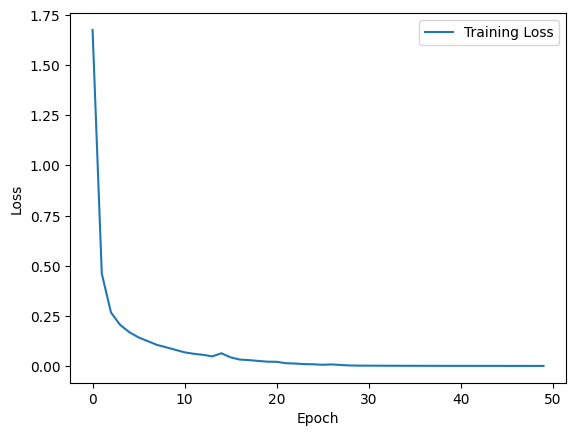

In [ ]:
plt.plot(loss_per_epoch, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

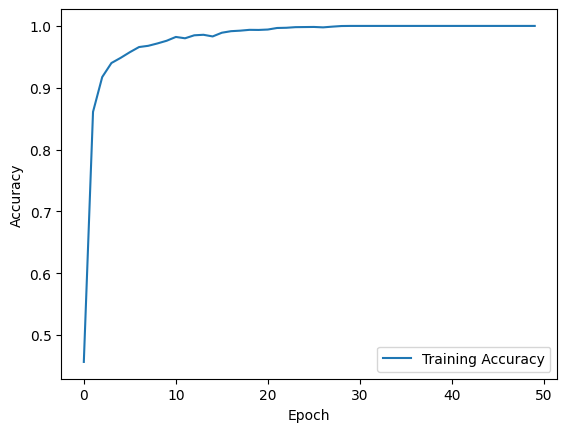

In [ ]:
plt.plot(acc_per_epoch, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()